<h1 align=center><font size = 5 color  = "GREEN" >  Accident Severity Prediction and Analysis <br> </font></h1>
<img src="https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2016/09/Top-25-Causes-Of-Road-Accidents-1.jpg" style="float: left; width: 30%; margin-right: 10%; margin-bottom: 0.5em;">
<img src="https://th.bing.com/th/id/OIP.eKMh15QVhFzTHgCm9gD50QHaHb?w=172&h=180&c=7&o=5&pid=1.7" style="float: left; margin-right: 10%;  margin-bottom: 0.5em;">
<img src="https://th.bing.com/th/id/OIP.rtIadL0BKXsamUJuxPvZTQHaDH?w=343&h=147&c=7&o=5&pid=1.7" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">

<h1 align=center><font size = 5 color  = "RED" >  SEATTLE MAP  </font></h1>

In [1]:
# !conda install -c conda-forge folium=0.5.0 --yes
import folium
from IPython.display import display
LDN_COORDINATES = (47.60,-122.33)
seattle_map = folium.Map(LDN_COORDINATES, zoom_start=11)
# display map
display(seattle_map)

## In this project, we will be predicting the severity if an accident occurs based on some factors including Weather, Light, Road, Speeding, Inattention etc.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.	[Downloading and Prepping Data](#0)<br>
2.	[Feature Importance and Heat Map Visualization](#2)<br>
3.	[Prepaing and Exploring Datasets with pandas](#4)<br>
4.	[Visualizing Data using Folium](#6)<br>
5.	[Visualizing Data using Grouped Bar Charts](#8)<br> 
6.	[Visualizing Data using Bubble Plots](#10)<br>
7.	[Preprocessing Data ](#12)<br>
8.	[Splitting Data ](#14)<br>
9.	[Training Data ](#16)<br>
10. [Scoring and Evaluation](#18)<br>

</div>
<hr>

<h2><font size = 5 color  = "PURPLE" > Downloading and Prepping Data   </font></h2><a id="0"></a>

###  Loading Libraries

Toolkits: The course heavily relies on [*pandas*](http://pandas.pydata.org/) and [**Numpy**](http://www.numpy.org/) for data wrangling, analysis, and visualization. The primary plotting library that we are exploring in the course is [Matplotlib](http://matplotlib.org/).


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns


### Downloading and Prepping the Dataset

In [3]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


<h2><font size = 5 color  = "PURPLE" > Feature Importance and Heat Map Visualization     </font></h2><a id="2"></a>

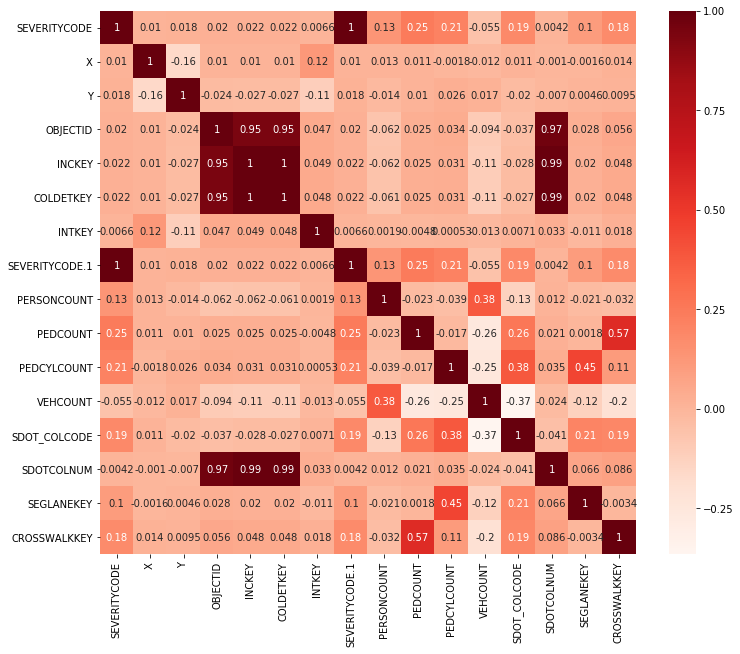

In [5]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

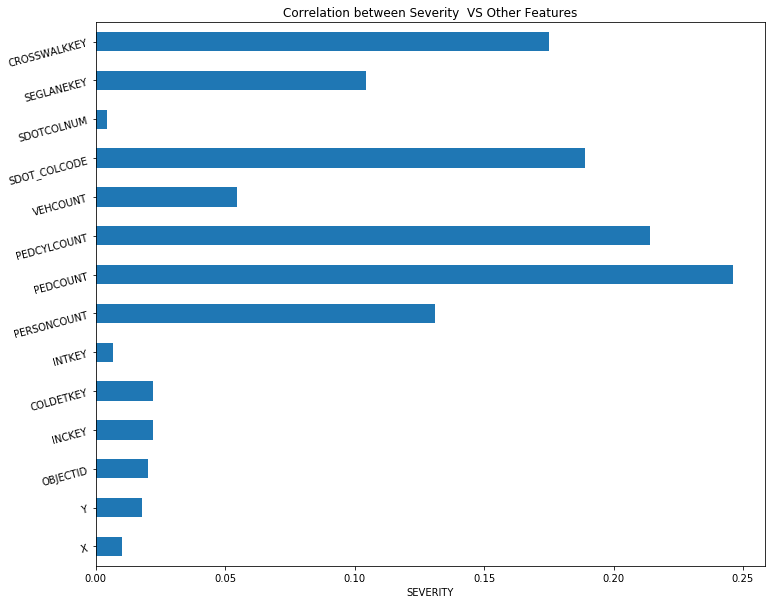

In [6]:
plt.figure(figsize=(12,10))
cor_target = abs(cor["SEVERITYCODE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target < 1]
relevant_features.plot.barh(rot=15, title="Correlation between Severity  VS Other Features");
plt.xlabel("SEVERITY")
plt.show(block=True);

<h2><font size = 5 color  = "PURPLE" > Prepaing and Exploring Datasets with pandas     </font></h2><a id="4"></a>

### Feature Selection

In [7]:
to_drop = [ 'OBJECTID', 'INCKEY', 'COLDETKEY',
          'REPORTNO', 'STATUS', 'INTKEY',
          'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
         'INCDATE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'SEVERITYCODE.1',
           'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'
          ]

df.drop(to_drop,inplace=True,axis=1)
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'ST_COLCODE', 'HITPARKEDCAR'],
      dtype='object')

### Feature Engineering or Creating new features

In [8]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')
df['Year']=df['INCDTTM'].dt.year
df['Month']=df['INCDTTM'].dt.strftime('%b')
df['Day']=df['INCDTTM'].dt.day
df['Hour']=df['INCDTTM'].dt.hour
df['Weekend']=df['INCDTTM'].dt.weekday
df.drop(['INCDTTM'],axis = 1,inplace = True)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,...,Daylight,NaN,NaN,10,N,2013,Mar,27,14,2
1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,...,Dark - Street Lights On,NaN,NaN,11,N,2006,Dec,20,18,2
2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,...,Daylight,NaN,NaN,32,N,2004,Nov,18,10,3
3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,...,Daylight,NaN,NaN,23,N,2013,Mar,29,9,4
4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,...,Daylight,NaN,NaN,10,N,2004,Jan,28,8,2


### Statistical Evaluation

In [9]:
df.describe(include = 'all')

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
count,194673.000000,189339.000000,189339.000000,192747,194673,189769,194673.000000,194673.000000,194673.000000,194673.000000,...,189503,4667,9333,194655,194673,194673.000000,194673,194673.000000,194673.000000,194673.000000
unique,NaN,NaN,NaN,3,2,10,NaN,NaN,NaN,NaN,...,9,1,1,115,2,NaN,12,NaN,NaN,NaN
top,NaN,NaN,NaN,Block,Property Damage Only Collision,Parked Car,NaN,NaN,NaN,NaN,...,Daylight,Y,Y,32,N,NaN,Oct,NaN,NaN,NaN
freq,NaN,NaN,NaN,126926,136485,47987,NaN,NaN,NaN,NaN,...,116137,4667,9333,27612,187457,NaN,17768,NaN,NaN,NaN
mean,1.298901,-122.330518,47.619543,NaN,NaN,NaN,2.444427,0.037139,0.028391,1.920780,...,NaN,NaN,NaN,NaN,NaN,2011.147766,NaN,15.609032,11.167106,2.938728
std,0.457778,0.029976,0.056157,NaN,NaN,NaN,1.345929,0.198150,0.167413,0.631047,...,NaN,NaN,NaN,NaN,NaN,4.676992,NaN,8.792279,7.075297,1.921549
min,1.000000,-122.419091,47.495573,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN,1.000000,0.000000,0.000000
25%,1.000000,-122.348673,47.575956,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,8.000000,6.000000,1.000000
50%,1.000000,-122.330224,47.615369,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,15.000000,12.000000,3.000000
75%,2.000000,-122.311937,47.663664,NaN,NaN,NaN,3.000000,0.000000,0.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,23.000000,17.000000,5.000000


In [10]:
df = df.replace(to_replace = 'Unknown',value = np.NaN)
df[['SPEEDING', 'INATTENTIONIND','UNDERINFL', 'PEDROWNOTGRNT']] = df[['SPEEDING', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT']].replace(to_replace = [np.NaN, 0],value = 'N')
df[['SPEEDING', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT']] = df[['SPEEDING', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT']].replace(to_replace = 1,value = 'Y')
df = df.replace(to_replace = ' ',value = np.NaN)
df.isna().sum()

SEVERITYCODE          0
X                  5334
Y                  5334
ADDRTYPE           1926
SEVERITYDESC          0
COLLISIONTYPE      4904
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
JUNCTIONTYPE       6338
SDOT_COLCODE          0
INATTENTIONIND        0
UNDERINFL             0
WEATHER           20172
ROADCOND          20090
LIGHTCOND         18643
PEDROWNOTGRNT         0
SPEEDING              0
ST_COLCODE         4904
HITPARKEDCAR          0
Year                  0
Month                 0
Day                   0
Hour                  0
Weekend               0
dtype: int64

In [11]:
df.shape

(194673, 26)

### As the missing values << Total value it better to remove a row having missing value

In [12]:
df = df[['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT','SEVERITYDESC', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR', 'Year',
       'Month', 'Day', 'Hour', 'Weekend']].dropna(how = 'any')

In [13]:
df.shape

(165186, 26)

In [14]:
df.describe(include = 'all')

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SEVERITYDESC,VEHCOUNT,...,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
count,165186.000000,165186.000000,165186.000000,165186,165186,165186.000000,165186.000000,165186.000000,165186,165186.000000,...,165186,165186,165186,165186,165186,165186.000000,165186,165186.000000,165186.000000,165186.000000
unique,NaN,NaN,NaN,2,10,NaN,NaN,NaN,2,NaN,...,8,2,2,114,2,NaN,12,NaN,NaN,NaN
top,NaN,NaN,NaN,Block,Angles,NaN,NaN,NaN,Property Damage Only Collision,NaN,...,Daylight,N,N,10,N,NaN,Oct,NaN,NaN,NaN
freq,NaN,NaN,NaN,104167,33644,NaN,NaN,NaN,110508,NaN,...,109572,160722,156699,22769,160734,NaN,15022,NaN,NaN,NaN
mean,1.331009,-122.330327,47.618964,NaN,NaN,2.515776,0.041438,0.031867,NaN,1.974508,...,NaN,NaN,NaN,NaN,NaN,2011.032031,NaN,15.646102,11.487184,2.940158
std,0.470578,0.029791,0.056689,NaN,NaN,1.412859,0.209230,0.177054,NaN,0.576584,...,NaN,NaN,NaN,NaN,NaN,4.710105,NaN,8.779423,6.888080,1.918400
min,1.000000,-122.419032,47.495573,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN,1.000000,0.000000,0.000000
25%,1.000000,-122.348141,47.574310,NaN,NaN,2.000000,0.000000,0.000000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,8.000000,7.000000,1.000000
50%,1.000000,-122.330276,47.614832,NaN,NaN,2.000000,0.000000,0.000000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,16.000000,13.000000,3.000000
75%,2.000000,-122.311937,47.663664,NaN,NaN,3.000000,0.000000,0.000000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,23.000000,17.000000,5.000000


In [15]:
df.head(25)

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SEVERITYDESC,VEHCOUNT,...,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,Injury Collision,2,...,Daylight,N,N,10,N,2013,Mar,27,14,2
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,Property Damage Only Collision,2,...,Dark - Street Lights On,N,N,11,N,2006,Dec,20,18,2
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,Property Damage Only Collision,3,...,Daylight,N,N,32,N,2004,Nov,18,10,3
3,1,-122.334803,47.604803,Block,Other,3,0,0,Property Damage Only Collision,3,...,Daylight,N,N,23,N,2013,Mar,29,9,4
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,Injury Collision,2,...,Daylight,N,N,10,N,2004,Jan,28,8,2
5,1,-122.387598,47.690575,Intersection,Angles,2,0,0,Property Damage Only Collision,2,...,Daylight,N,N,10,N,2019,Apr,20,17,5
6,1,-122.338485,47.618534,Intersection,Angles,2,0,0,Property Damage Only Collision,2,...,Daylight,N,N,10,N,2008,Dec,9,0,1
7,2,-122.320780,47.614076,Intersection,Cycles,3,0,1,Injury Collision,1,...,Daylight,N,N,5,N,2020,Apr,15,17,2
8,1,-122.335930,47.611904,Block,Parked Car,2,0,0,Property Damage Only Collision,2,...,Daylight,N,N,32,N,2006,Jun,15,13,3
9,2,-122.384700,47.528475,Intersection,Angles,2,0,0,Injury Collision,2,...,Daylight,N,N,10,N,2006,Mar,20,15,0


In [16]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
ADDRTYPE           object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
SEVERITYDESC       object
VEHCOUNT            int64
JUNCTIONTYPE       object
SDOT_COLCODE        int64
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING           object
ST_COLCODE         object
HITPARKEDCAR       object
Year                int64
Month              object
Day                 int64
Hour                int64
Weekend             int64
dtype: object

<h2><font size = 5 color  = "PURPLE" > Visualizing Data using Folium   </font></h2><a id="6"></a>

### Accident due to Speeding between year (2017-20) and its locations plot

In [17]:
data2 = df.copy(deep = True)

speed = data2[data2['SPEEDING'] == "Y"]
speed = speed[speed['Year'].isin([2017,2020])]
speed_sev1 = speed[speed['SEVERITYCODE'] == 1]
speed_sev2 = speed[speed['SEVERITYCODE'] == 2]
speed_sev1 = speed_sev1[['X',"Y"]]
speed_sev2 = speed_sev2[['X',"Y"]]
speed.dropna(inplace = True)
speed_sev1.dropna(inplace = True)
speed_sev2.dropna(inplace = True)
print(speed_sev1.count())
print(speed_sev2.count())

X    229
Y    229
dtype: int64
X    153
Y    153
dtype: int64


In [18]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(speed_sev1.Y, speed_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(speed_sev2.Y, speed_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
seattle_map1 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map1.add_child(incidents1)
seattle_map1.add_child(incidents2)

### Accident due to Alcohol Consumption between year (2017-20) and its locations plot

In [19]:
alcohol = data2[data2['UNDERINFL'] == "Y"]
alcohol = alcohol[alcohol['Year'].isin([2017,2020])]
alc_sev1 = alcohol[alcohol['SEVERITYCODE'] == 1]
alc_sev2 = alcohol[alcohol['SEVERITYCODE'] == 2]
alc_sev1 = alc_sev1[['X',"Y"]]
alc_sev2 = alc_sev2[['X',"Y"]]
alc_sev1.dropna(inplace = True)
alc_sev2.dropna(inplace = True)
print(alc_sev1.count())
print(alc_sev2.count())

X    266
Y    266
dtype: int64
X    162
Y    162
dtype: int64


In [20]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(alc_sev1.Y, alc_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(alc_sev2.Y, alc_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
seattle_map2 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map2.add_child(incidents1)
seattle_map2.add_child(incidents2)


### Accident due to Inattention between year (2017-20) and its locations plot

In [21]:
billboard = data2[data2['INATTENTIONIND'] == "Y"]
billboard = billboard[billboard['Year'].isin([2017,2020])]
bill_sev1 = billboard[billboard['SEVERITYCODE'] == 1]
bill_sev2 = billboard[billboard['SEVERITYCODE'] == 2]
bill_sev1 = bill_sev1[['X',"Y"]]
bill_sev2 = bill_sev2[['X',"Y"]]
bill_sev1.dropna(inplace = True)
bill_sev2.dropna(inplace = True)
print(bill_sev1.count())
print(bill_sev2.count())

X    1220
Y    1220
dtype: int64
X    670
Y    670
dtype: int64


In [22]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(bill_sev1.Y, bill_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(bill_sev2.Y, bill_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
seattle_map3 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map3.add_child(incidents1)
seattle_map3.add_child(incidents2)

### Hitting Parked Car between year (2017-20) and its locations plot

In [23]:
parked = data2[data2['HITPARKEDCAR'] == "Y"]
parked = parked[parked['Year'].isin([2020])]


park_sev1 = parked[parked['SEVERITYCODE'] == 1]
park_sev2 = parked[parked['SEVERITYCODE'] == 2]
park_sev1 = park_sev1[['X',"Y"]]
park_sev2 = park_sev2[['X',"Y"]]

park_sev1.dropna(inplace = True)
park_sev2.dropna(inplace = True)
print(park_sev1.count())
print(park_sev2.count())

X    114
Y    114
dtype: int64
X    12
Y    12
dtype: int64


In [24]:
incidents1 = folium.map.FeatureGroup()
incidents2 = folium.map.FeatureGroup()
#print(speed.count())
for lat, lng, in zip(park_sev1.Y, park_sev1.X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

for lat, lng, in zip(park_sev2.Y, park_sev2.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=0.5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
seattle_map4 = folium.Map(LDN_COORDINATES, zoom_start=11)
seattle_map4.add_child(incidents1)
seattle_map4.add_child(incidents2)


<h2><font size = 5 color  = "PURPLE" >Visualizing Data using Grouped Bar Charts    </font></h2><a id="8"></a>

###  Month Vs No. of Accidents

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


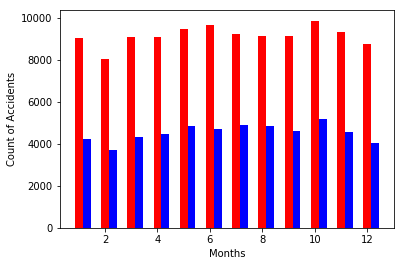

In [25]:
data3 = data2[data2['Year'] != 2020]
data3['Month'] = data3['Month'].replace(['Jan', 'Feb', 'Mar', 'Apr', 'May',  'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) 
years  = data3['Month'].unique()

width = 0.3
for year in years:
  X2 = data3[data3['Month'] == year]
  val1 = X2[X2['SEVERITYCODE'] == 1 ].shape[0]
  val2 = X2[X2['SEVERITYCODE'] == 2 ].shape[0]
  plt.bar(year, val1, width  = width, color = 'red')
  # fig , ax = plt.subplots()
  # df.plot.bar(x = 'Month', ax = ax)
  plt.bar( year + width, val2, width  = width,color = 'blue')
  
plt.xlabel('Months')
plt.ylabel('Count of Accidents')
# plt.legend(X2['SEVERITYDESC'].unique())
plt.show()


### Hours vs No. of Accidents

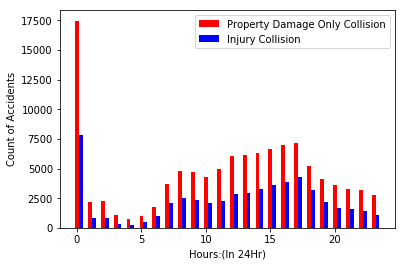

In [26]:
years  = data2['Hour'].unique()
width = 0.3
for year in years:
  X2 = data2[data2['Hour'] == year]
  val1 = X2[X2['SEVERITYCODE'] == 1 ].shape[0]
  val2 = X2[X2['SEVERITYCODE'] == 2 ].shape[0]
  plt.bar(int(year), val1, width  = width, color = 'red')
  plt.bar(int(year) + width, val2, width  = width,color = 'blue')

plt.xlabel('Hours:(In 24Hr)')
plt.ylabel('Count of Accidents')
plt.legend(X2['SEVERITYDESC'].unique())
plt.show()


### Weekend vs No. of Accident

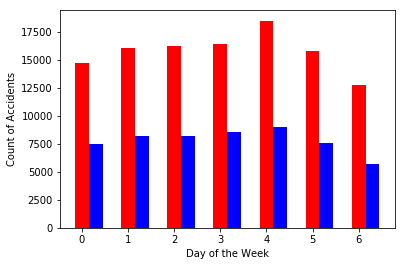

In [27]:
years  = data2['Weekend'].unique()
width = 0.3
for year in years:
  X2 = data2[data2['Weekend'] == year]
  val1 = X2[X2['SEVERITYCODE'] == 1 ].shape[0]
  val2 = X2[X2['SEVERITYCODE'] == 2 ].shape[0]
  plt.bar(int(year), val1, width  = width, color = 'red')
  plt.bar(int(year) + width, val2, width  = width,color = 'blue')

plt.xlabel('Day of the Week')
plt.ylabel('Count of Accidents')
#plt.legend(X2['SEVERITYDESC'].unique())
plt.show()


### Year vs No. of Accident

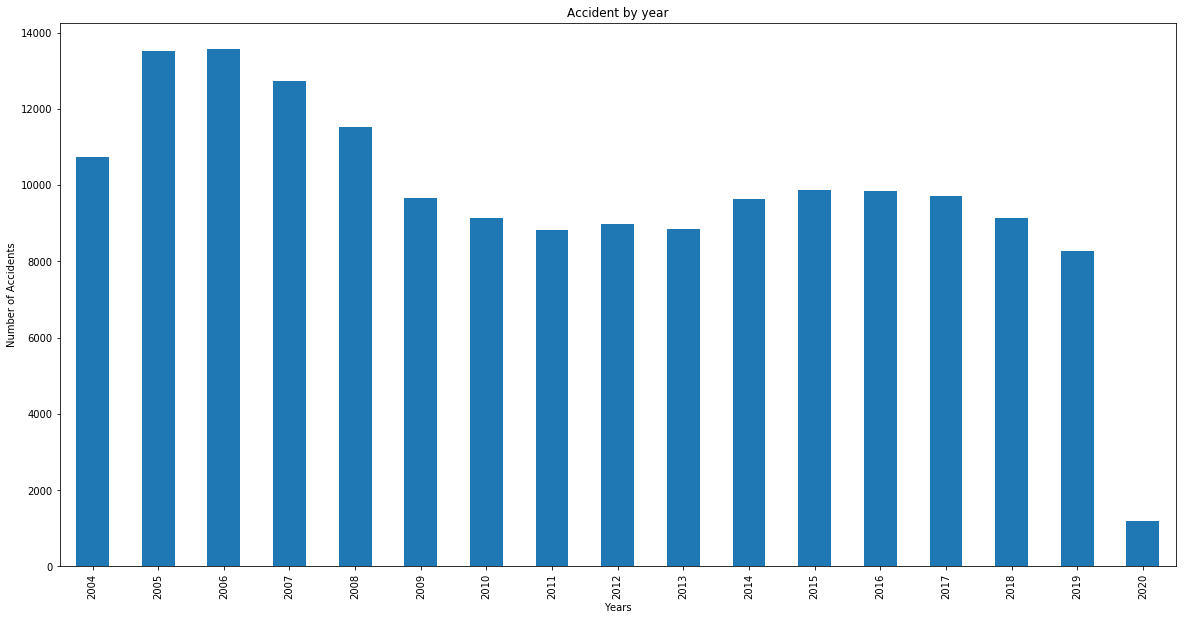

In [28]:
fig = plt.figure(figsize=(25,20))
d = data2['Year'].value_counts().sort_index()
d.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )
plt.title('Accident by year')
plt.ylabel('Number of Accidents')
plt.xlabel('Years')
plt.show()


<h2><font size = 5 color  = "PURPLE" >Visualizing Data using Bubble Plots    </font></h2><a id="10"></a>

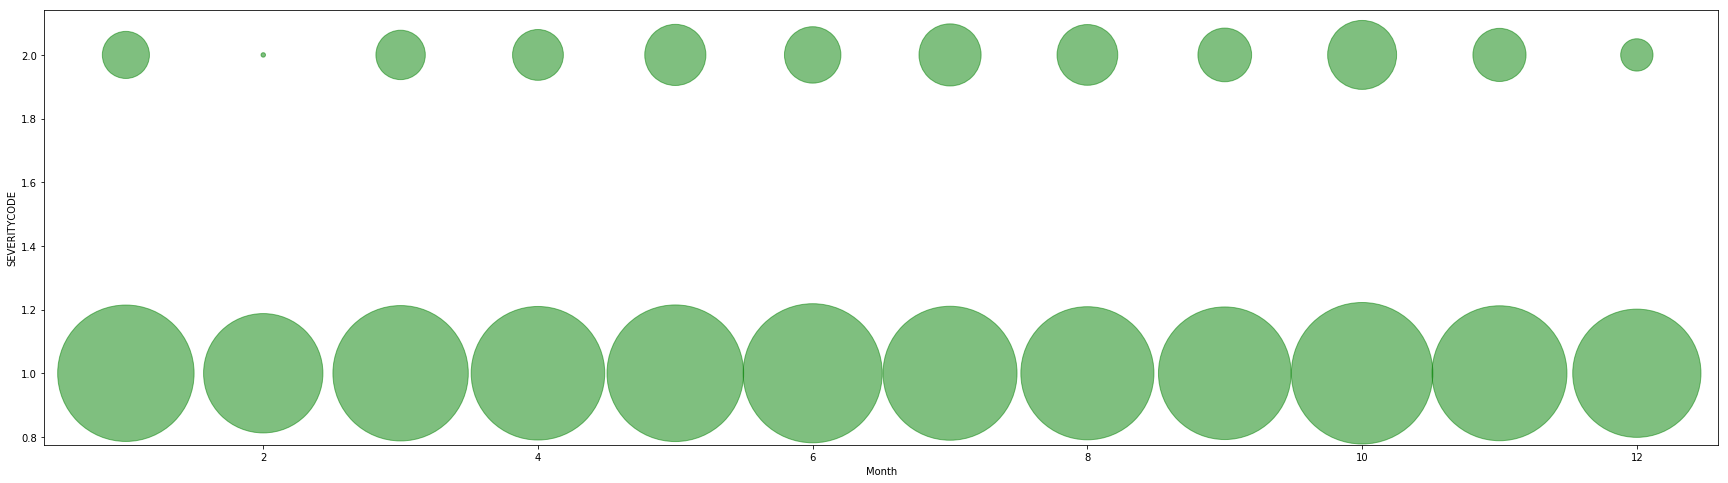

In [29]:
d = df.pivot_table(index = ['Month','SEVERITYCODE'],aggfunc = 'size')
li1 = d.values
li2 = list(d.index)
df1 = pd.DataFrame(li2,columns = ['Month', 'SEVERITYCODE'])
df1['No_of_Accident'] = li1
df1
norm_No_of_Accident = (df1['No_of_Accident'] - df1['No_of_Accident'].min()) / (df1['No_of_Accident'].max() - df1['No_of_Accident'].min())
df1['Month'] = df1['Month'].replace(['Jan', 'Feb', 'Mar', 'Apr', 'May',  'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) 

ax0 = df1.plot(kind='scatter',
                    x='Month',
                    y= 'SEVERITYCODE',
                    figsize=(30, 8),
                    alpha=0.5,                  # transparency
                    color= 'green',
                    s= norm_No_of_Accident*20000 + 20  # pass in weights
                   )

<h2><font size = 5 color  = "PURPLE" >Preprocessing Data   </font></h2><a id="12"></a>

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [31]:
df = df.drop('SEVERITYDESC' , axis =1)
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)
df['LIGHTCOND'] = df['LIGHTCOND'].astype(str)
df['ROADCOND'] = df['ROADCOND'].astype(str)
df['WEATHER'] = df['WEATHER'].astype(str)
df['SPEEDING'] = df['SPEEDING'].astype(str)
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].astype(str)
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].astype(str)
df['ST_COLCODE'] = df['ST_COLCODE'].astype(str)
df['INATTENTIONIND'] = df['INATTENTIONIND'].astype(str)
df['UNDERINFL'] = df['UNDERINFL'].astype(str)
df['HITPARKEDCAR'] = df['HITPARKEDCAR'].astype(str)

In [32]:
cols = ['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR', 'Year',
       'Month', 'Day', 'Hour', 'Weekend']
df[cols]= df[cols].apply(le.fit_transform)


In [33]:
df.dtypes

SEVERITYCODE      int64
X                 int64
Y                 int64
ADDRTYPE          int64
COLLISIONTYPE     int64
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE      int64
SDOT_COLCODE      int64
INATTENTIONIND    int64
UNDERINFL         int64
WEATHER           int64
ROADCOND          int64
LIGHTCOND         int64
PEDROWNOTGRNT     int64
SPEEDING          int64
ST_COLCODE        int64
HITPARKEDCAR      int64
Year              int64
Month             int64
Day               int64
Hour              int64
Weekend           int64
dtype: object

In [34]:
df.head(30)

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,...,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,1,12314,20443,1,0,2,0,0,2,1,...,5,0,0,2,0,9,7,26,14,2
1,0,7526,13463,0,9,2,0,0,2,4,...,2,0,0,3,0,2,2,19,18,2
2,0,9832,8926,0,5,4,0,0,3,4,...,5,0,0,26,0,0,9,17,10,3
3,0,9791,8585,0,4,3,0,0,3,4,...,5,0,0,16,0,9,7,28,9,4
4,1,16002,3038,1,0,2,0,0,2,1,...,5,0,0,2,0,0,4,27,8,2
5,0,1460,19299,1,0,2,0,0,2,1,...,5,0,0,2,0,15,0,19,17,5
6,0,9122,10383,1,0,2,0,0,2,1,...,5,0,0,2,0,4,2,8,0,1
7,1,12894,9681,1,1,3,0,1,1,1,...,5,0,0,35,0,16,0,14,17,2
8,0,9573,9400,0,5,2,0,0,2,4,...,5,0,0,26,0,2,6,14,13,3
9,1,1915,1512,1,0,2,0,0,2,1,...,5,0,0,2,0,2,7,19,15,0


In [35]:
df.describe(include = "all")

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,...,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
count,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000,...,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000,165186.000000
mean,0.331009,11069.887206,10715.071653,0.369396,4.417100,2.514971,0.041438,0.031867,1.974508,2.635720,...,4.133589,0.027024,0.051378,14.251571,0.026951,7.032031,5.590068,14.646102,11.487184,2.940158
std,0.470578,5420.142370,6080.783249,0.482643,2.900859,1.385978,0.209230,0.177054,0.576584,1.380091,...,1.438093,0.162154,0.220769,12.751446,0.161942,4.710105,3.456288,8.779423,6.888080,1.918400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7346.000000,6057.000000,0.000000,3.000000,2.000000,0.000000,0.000000,2.000000,1.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,3.000000,3.000000,7.000000,7.000000,1.000000
50%,0.000000,10684.000000,9804.000000,0.000000,5.000000,2.000000,0.000000,0.000000,2.000000,3.000000,...,5.000000,0.000000,0.000000,7.000000,0.000000,7.000000,6.000000,15.000000,13.000000,3.000000
75%,1.000000,15024.000000,15520.000000,1.000000,7.000000,3.000000,0.000000,0.000000,2.000000,4.000000,...,5.000000,0.000000,0.000000,26.000000,0.000000,11.000000,9.000000,22.000000,17.000000,5.000000
max,1.000000,21870.000000,22107.000000,1.000000,9.000000,46.000000,6.000000,2.000000,12.000000,5.000000,...,7.000000,1.000000,1.000000,61.000000,1.000000,16.000000,11.000000,30.000000,23.000000,6.000000


In [39]:
y = df['SEVERITYCODE']
y[0:5]

0    1
1    0
2    0
3    0
4    1
Name: SEVERITYCODE, dtype: int64

In [37]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR', 'Year',
       'Month', 'Day', 'Hour', 'Weekend'],
      dtype='object')

In [38]:
X = df.drop(['SEVERITYCODE', 'X', 'Y'], axis = 1)

In [40]:
X = StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 1.30656956, -1.52269117, -0.37155907, -0.19805097, -0.17998557,
         0.04421306, -1.18522959, -0.64455834, -0.45088303,  0.82321484,
         0.73020802,  1.62776894,  0.60247403, -0.16665733, -0.23272551,
        -0.96080147, -0.16642697,  0.41781988,  0.40793357,  1.29324354,
         0.36480752, -0.49007571],
       [-0.765363  ,  1.57984716, -0.37155907, -0.19805097, -0.17998557,
         0.04421306,  0.9885467 ,  0.41311137, -0.45088303, -1.13818089,
         1.68829774,  1.62776894, -1.48362793, -0.16665733, -0.23272551,
        -0.88237875, -0.16642697, -1.06835115, -1.03870931,  0.49592224,
         0.94552262, -0.49007571],
       [-0.765363  ,  0.20094123,  1.07147004, -0.19805097, -0.17998557,
         1.77857027,  0.9885467 , -0.00995651, -0.45088303, -1.13818089,
         0.73020802, -0.62107507,  0.60247403, -0.16665733, -0.23272551,
         0.92134371, -0.16642697, -1.49297144,  0.98659072,  0.26811615,
        -0.21590757,  0.03119361],
       [-0.765363  

<h2><font size = 5 color  = "PURPLE" >Splitting Data   </font></h2><a id="14"></a>

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=42)
print("Train Shape : ",X_train.shape,y_train.shape)
print("Train Shape : ",X_test.shape,y_test.shape)


Train Shape :  (132148, 22) (132148,)
Train Shape :  (33038, 22) (33038,)


<h2><font size = 5 color  = "PURPLE" >Training Data   </font></h2><a id="16"></a>

### Loading Required Libraries for Different Models

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


### Training and Fitting the data into Model

In [44]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
gbc = GradientBoostingClassifier(random_state=4).fit(X_train,y_train)
rfc = RandomForestClassifier(max_depth=10, random_state=4).fit(X_train,y_train)
dt = DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
xgb = XGBClassifier(random_state=4).fit(X_train,y_train)
clf = SVC(gamma='auto').fit(X_train, y_train)

print("Training Completed with different Models")

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Completed with different Models


<h2><font size = 5 color  = "PURPLE" >Scoring and Evaluation </font></h2><a id="18"></a>

### Loading libraries

In [46]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools

### Confusion Matrix Plot Function defination

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<h3><font size = 5 color  = "SKYBLUE" >Logistic Regression </font></h3>

In [48]:
l = []
l.append('Logistic Regression') 
print(l[0])
yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)
yhat_prob


Logistic Regression


array([[0.69077696, 0.30922304],
       [0.74374642, 0.25625358],
       [0.51418947, 0.48581053],
       ...,
       [0.54063452, 0.45936548],
       [0.75598362, 0.24401638],
       [0.83795727, 0.16204273]])

In [49]:
l.append(f1_score(y_test, yhat))
l.append(jaccard_similarity_score(y_test, yhat))
l.append(log_loss(y_test,yhat))
Eval = [{'Model_Name': l[0] ,'F1Score': l[1], 'Jaccard_Similarity': l[2], 'Log_Loss': l[3]}]
Eval_score =pd.DataFrame.from_dict(Eval)[list(Eval[0].keys())]
Eval_score.loc[[0]]

,Model_Name,F1Score,Jaccard_Similarity,Log_Loss
0,Logistic Regression,0.387805,0.728313,9.383765


Confusion matrix, without normalization
[[21219   951]
 [ 8025  2843]]


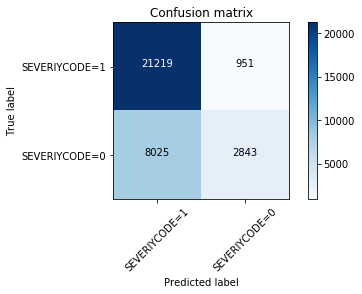

In [50]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERIYCODE=1','SEVERIYCODE=0'],normalize= False,  title='Confusion matrix')


Feature: 0, Score: 0.03178
Feature: 1, Score: -0.14250
Feature: 2, Score: 0.25249
Feature: 3, Score: 0.53550
Feature: 4, Score: 0.49452
Feature: 5, Score: 0.12564
Feature: 6, Score: -0.19598
Feature: 7, Score: 0.31154
Feature: 8, Score: 0.08325
Feature: 9, Score: 0.07258
Feature: 10, Score: -0.02953
Feature: 11, Score: 0.02528
Feature: 12, Score: 0.05086
Feature: 13, Score: 0.04403
Feature: 14, Score: 0.11698
Feature: 15, Score: -0.32071
Feature: 16, Score: -0.15287
Feature: 17, Score: -0.00996
Feature: 18, Score: 0.01113
Feature: 19, Score: -0.00574
Feature: 20, Score: 0.01714
Feature: 21, Score: -0.02006


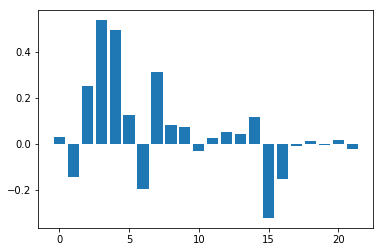

In [51]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<h3><font size = 5 color  = "SKYBLUE" >Gradient Boosting Classifier </font></h3>

In [52]:
l[0] = 'Gradient Boosting Classifier'
print(l[0])
y_hat = gbc.predict(X_test)
l[1] = f1_score(y_test,y_hat, average='weighted')
l[2] = jaccard_similarity_score(y_test,y_hat)
l[3] = log_loss(y_test,y_hat)
Eval_score = Eval_score.append({'Model_Name': l[0] ,'F1Score': l[1], 'Jaccard_Similarity': l[2], 'Log_Loss': l[3]} , ignore_index=True)
Eval_score.loc[[1]]

Gradient Boosting Classifier


,Model_Name,F1Score,Jaccard_Similarity,Log_Loss
1,Gradient Boosting Classifier,0.707706,0.739179,9.008469


Confusion matrix, without normalization
[[21219   951]
 [ 8025  2843]]


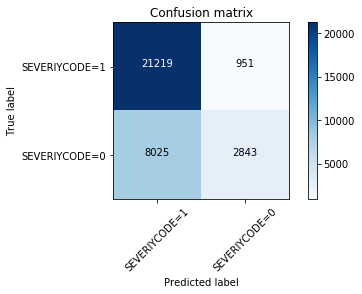

In [53]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERIYCODE=1','SEVERIYCODE=0'],normalize= False,  title='Confusion matrix')

<h3><font size = 5 color  = "SKYBLUE" >Random Forest Classifier </font></h3>

In [54]:
l[0] = 'Random Forest Classifier'
print(l[0])
y_hat = rfc.predict(X_test)
l[1] = f1_score(y_test,y_hat, average='weighted')
l[2] = jaccard_similarity_score(y_test,y_hat)
l[3] = log_loss(y_test,y_hat)
Eval_score = Eval_score.append({'Model_Name': l[0] ,'F1Score': l[1], 'Jaccard_Similarity': l[2], 'Log_Loss': l[3]} , ignore_index=True)
Eval_score.loc[[2]]

Random Forest Classifier


,Model_Name,F1Score,Jaccard_Similarity,Log_Loss
2,Random Forest Classifier,0.695356,0.738029,9.048182


Confusion matrix, without normalization
[[21219   951]
 [ 8025  2843]]


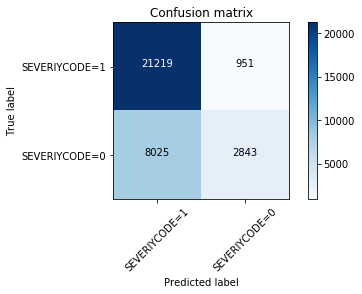

In [55]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERIYCODE=1','SEVERIYCODE=0'],normalize= False,  title='Confusion matrix')

<h3><font size = 5 color  = "SKYBLUE" >Decision Tree Classifier </font></h3>

In [56]:
l[0] = 'Decision Tree Classifier'
print(l[0])
y_hat = dt.predict(X_test)
l[1] = f1_score(y_test,y_hat, average='weighted')
l[2] = jaccard_similarity_score(y_test,y_hat)
l[3] = log_loss(y_test,y_hat)
Eval_score = Eval_score.append({'Model_Name': l[0] ,'F1Score': l[1], 'Jaccard_Similarity': l[2], 'Log_Loss': l[3]} , ignore_index=True)
Eval_score.loc[[3]]

Decision Tree Classifier


,Model_Name,F1Score,Jaccard_Similarity,Log_Loss
3,Decision Tree Classifier,0.656832,0.655488,11.899178


Confusion matrix, without normalization
[[21219   951]
 [ 8025  2843]]


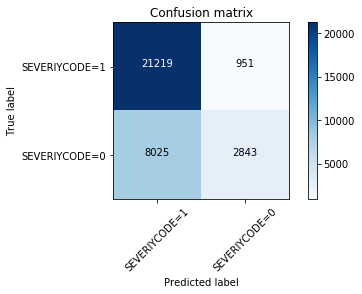

In [57]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERIYCODE=1','SEVERIYCODE=0'],normalize= False,  title='Confusion matrix')

<h3><font size = 5 color  = "SKYBLUE" >XGBoost Classifier </font></h3>

In [58]:
l[0] = 'XGBOOST Classifier'
print(l[0])
y_hat = dt.predict(X_test)
l[1] = f1_score(y_test,y_hat, average='weighted')
l[2] = jaccard_similarity_score(y_test,y_hat)
l[3] = log_loss(y_test,y_hat)
Eval_score = Eval_score.append({'Model_Name': l[0] ,'F1Score': l[1], 'Jaccard_Similarity': l[2], 'Log_Loss': l[3]} , ignore_index=True)
Eval_score.loc[[4]]


XGBOOST Classifier


,Model_Name,F1Score,Jaccard_Similarity,Log_Loss
4,XGBOOST Classifier,0.656832,0.655488,11.899178


Confusion matrix, without normalization
[[21219   951]
 [ 8025  2843]]


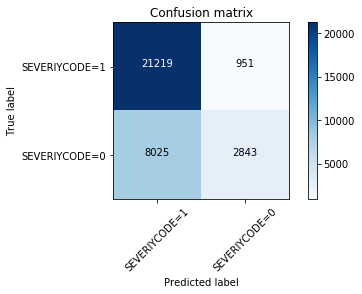

In [59]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERIYCODE=1','SEVERIYCODE=0'],normalize= False,  title='Confusion matrix')

Feature Importance =  [0.02 0.12 0.13 0.03 0.03 0.1  0.03 0.08 0.01 0.05 0.01 0.01 0.02 0.01
 0.02 0.23 0.   0.04 0.02 0.01 0.02 0.01]


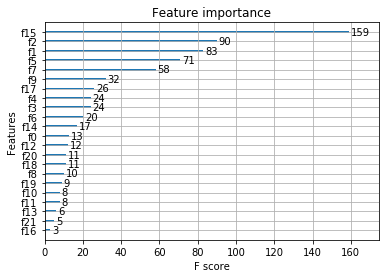

In [60]:
from xgboost import plot_importance
print('Feature Importance = ',xgb.feature_importances_)
plot_importance(xgb)
plt.show()

<h3><font size = 5 color  = "SKYBLUE" >KNeighbours Classifier </font></h3>

In [61]:
l[0] = 'KNeighbours Classifier'
y_hat = knn.predict(X_test)
l[1] = f1_score(y_test,y_hat, average='weighted')
l[2] = jaccard_similarity_score(y_test,y_hat)
l[3] = log_loss(y_test,y_hat)
Eval_score = Eval_score.append({'Model_Name': l[0] ,'F1Score': l[1], 'Jaccard_Similarity': l[2], 'Log_Loss': l[3]} , ignore_index=True)
Eval_score.loc[[5]]


,Model_Name,F1Score,Jaccard_Similarity,Log_Loss
5,KNeighbours Classifier,0.663528,0.700315,10.350811


Confusion matrix, without normalization
[[21219   951]
 [ 8025  2843]]


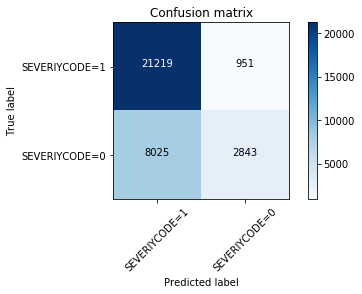

In [62]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERIYCODE=1','SEVERIYCODE=0'],normalize= False,  title='Confusion matrix')

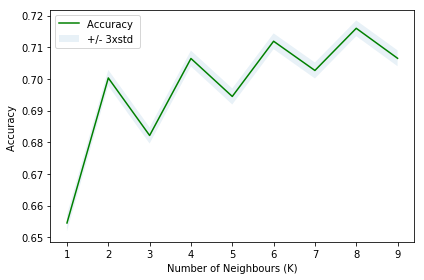

In [64]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

<h3><font size = 5 color  = "SKYBLUE" >Support Vector Machine </font></h3>

In [65]:
l[0] = 'Support Vector Machine'
y_hat = clf.predict(X_test)
l[1] = f1_score(y_test,y_hat, average='weighted')
l[2] = jaccard_similarity_score(y_test,y_hat)
l[3] = log_loss(y_test,y_hat)
Eval_score = Eval_score.append({'Model_Name': l[0] ,'F1Score': l[1], 'Jaccard_Similarity': l[2], 'Log_Loss': l[3]} , ignore_index=True)
Eval_score.iloc[[6]]

,Model_Name,F1Score,Jaccard_Similarity,Log_Loss
6,Support Vector Machine,0.68751,0.734609,9.166312


Confusion matrix, without normalization
[[19096  3074]
 [ 6622  4246]]


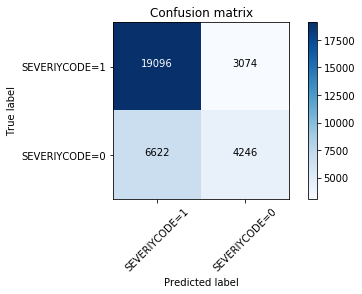

In [66]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERIYCODE=1','SEVERIYCODE=0'],normalize= False,  title='Confusion matrix')

<h3><font size = 5 color  = "Magenta" >Evaluation Report </font></h3>

In [67]:
Eval_score

,Model_Name,F1Score,Jaccard_Similarity,Log_Loss
0,Logistic Regression,0.387805,0.728313,9.383765
1,Gradient Boosting Classifier,0.707706,0.739179,9.008469
2,Random Forest Classifier,0.695356,0.738029,9.048182
3,Decision Tree Classifier,0.656832,0.655488,11.899178
4,XGBOOST Classifier,0.656832,0.655488,11.899178
5,KNeighbours Classifier,0.663528,0.700315,10.350811
6,Support Vector Machine,0.687510,0.734609,9.166312


<a href=" "><img src = "https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2016/09/Picture9-1.png" height = 100px > </a>
<h1 align=center><font size = 5 color  = "BLUE" >  PROJECT END <br> </font></h1>